# EXERCÍCIO 2 
PROPOSTO PELO PROF JULIANO DA PUCRS ENTRE AULA 3 E 4 DA DISCIPLINA DE PRÉ-PROCESSAMENTO DE DADOS NO CURSO DE PÓS GRADUAÇÃO EM CIÊNCIA DE DADOS E INTELIGÊNCIA ARTIFICIAL DA PUCRS - TURMA 2-2021

Neste exercício, são utilizados arquivos csv contendo informações sobre clubes, arenas (estadios), estados e jogos dos campeonatos brasileiros de 2013 a 2017 para exercitar manipulação de dados em objetos pandas DataFrames

## Estrutura dos arquivos: 
Obs: campos em itálico representam chaves estrangeiras, que ligam os dados entre arquivos

1.  Arquivos jogos_ano:
* *id_arena*
* *id_clube1* 
* *id_clube2* 
* *id_clube_vencedor* 
* *id_estado_vencedor* 
* *id_estado_clube1*
* *id_estado_clube2* 
* data 
* dia 
* horario 
* rodada 
* qtd_gols_clube1 
* qtd_gols_cube2 

2. Arquivo estados.csv: 
* *id_estado* 
* sigla_estado 
* desc_estado 

3. Arquivo arenas.csv: 
* *id_arena* 
* desc_arena 


4. Arquivo clubes.csv: 
*  *id_clube* 
*  desc_clube

# Item 2: introdução
imports de bibliotecas python e dos arquivos, definindo as chaves como índices

In [1]:
import numpy as np
import pandas as pd

In [2]:
#   Por serem arquivos pequenos e que estavam disponibilizados em um dropbox  
# de terceiros (portanto, cuja duração do link de download seria desconhecida), 
# os arquivos foram salvos no google drive em que está salvo este colab e de lá 
# serão importados.

from google.colab import drive
drive.mount('/content/gdrive')
folder_gdrive = '/content/gdrive/My Drive/Data Science/Python/2021-22 PUCRS Pós/Disciplina 5 Pré-processamento de Dados/Prof Juliano PUCRS/Aula 3/Datasets/'

Mounted at /content/gdrive


In [6]:
arenas_df  = pd.read_csv(folder_gdrive + 'arenas.csv',  index_col = 0) # col_0 = id_arena
clubes_df  = pd.read_csv(folder_gdrive + 'clubes.csv',  index_col = 0) # col_0 = id_clube
estados_df = pd.read_csv(folder_gdrive + 'estados.csv', index_col = 0) # col_0 = id_estado

lista_index_jogos = ['id_arena','id_clube1','id_clube2','id_clube_vencedor','id_estado_clube1','id_estado_clube2','id_estado_vencedor']
jogos_2013_df = pd.read_csv(folder_gdrive + 'jogos_2013.csv', index_col = lista_index_jogos)
jogos_2014_df = pd.read_csv(folder_gdrive + 'jogos_2014.csv', index_col = lista_index_jogos)
jogos_2015_df = pd.read_csv(folder_gdrive + 'jogos_2015.csv', index_col = lista_index_jogos)
jogos_2016_df = pd.read_csv(folder_gdrive + 'jogos_2016.csv', index_col = lista_index_jogos)
jogos_2017_df = pd.read_csv(folder_gdrive + 'jogos_2017.csv', index_col = lista_index_jogos)

# Item 3: concatenação dos jogos
concatenar os jogos de todos anos em um único dataframe

In [7]:
# breve olhada no formato dos df jogos
jogos_2017_df.head(5)

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,
51,14,3,0,19,13,0,13/05/2017,Sábado,16:00,1ª Rodada,1,1
7,9,8,0,25,24,0,13/05/2017,Sábado,19:00,1ª Rodada,1,1
51,15,25,15,19,25,19,14/05/2017,Domingo,11:00,1ª Rodada,3,2
52,12,26,12,13,25,13,14/05/2017,Domingo,16:00,1ª Rodada,1,0
54,22,27,22,25,17,25,14/05/2017,Domingo,16:00,1ª Rodada,4,0


In [8]:
# Verificar o Shape de cada dataframe de jogos para verificar resultado da concatenação:
#jogos_2013_df.shape # (380, 6)
#jogos_2014_df.shape # (380, 6)
#jogos_2015_df.shape # (380, 6)
#jogos_2016_df.shape # (380, 6)
#jogos_2017_df.shape # (380, 6)
# Resultado: df resultante deve ter shape (1900, 6)
380*5

1900

In [9]:
# Rodando concatenação de todos de 2013 a 2017
jogos_2013_2017_df = pd.concat([jogos_2013_df, jogos_2014_df, jogos_2015_df, jogos_2016_df, jogos_2017_df])
jogos_2013_2017_df.shape # (1900, 6) -- Show!

(1900, 6)

# Item 4: desnormalização dos dados
- incluir informações de todas tabelas/dataframes em uma só

In [10]:
# Verificando inicialmente onde há valores nulos para garantir que não alteremos isto
jogos_2013_2017_df.isnull().sum()

data                0
dia                 0
horario            10
rodada              0
qtd_gols_clube1     0
qtd_gols_clube2     0
dtype: int64

### JOIN ARENAS

In [11]:
# Iniciando os joins pelas arenas, que é simples, e mantendo versionamento do que ocorre
jogos_arenas_df = jogos_2013_2017_df.join(arenas_df) 
jogos_arenas_df.head(5)


,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse


### JOIN ESTADOS

In [12]:
# Fazendo então Join das informações da tabela estados (sigla_estado e desc_estado) para o clube 1
jogos_arenas_c1_df = jogos_arenas_df.join(estados_df, on='id_estado_clube1', rsuffix='_clube1')
jogos_arenas_c1_df.head(5)


,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado,desc_estado
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina


In [13]:
# Agora, join do clube 2
jogos_arenas_c1_c2_df = jogos_arenas_c1_df.join(estados_df, on='id_estado_clube2', rsuffix='_clube2')
jogos_arenas_c1_c2_df.head(5)

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado,desc_estado,sigla_estado_clube2,desc_estado_clube2
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia


In [14]:
# Finalmente, do clube vencedor
jogos_arenas_estados_df = jogos_arenas_c1_c2_df.join(estados_df, on='id_estado_vencedor', rsuffix='_vencedor')
# Renomeando as colunas do estado do clube 1:
jogos_arenas_estados_df.rename(columns={'sigla_estado':'sigla_estado_clube1', 'desc_estado':'desc_estado_clube1'}, inplace=True)
jogos_arenas_estados_df.head(5)

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina


In [15]:
# Fazendo em apenas uma linha:
jogos_arenas_estados_1l_df = jogos_arenas_df.join(estados_df, on='id_estado_clube1').join(estados_df, on='id_estado_clube2', rsuffix='_clube2').join(estados_df, on='id_estado_vencedor', rsuffix='_vencedor')
jogos_arenas_estados_1l_df.rename(columns={'sigla_estado':'sigla_estado_clube1', 'desc_estado':'desc_estado_clube1'}, inplace=True)
jogos_arenas_estados_1l_df.head(5)

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina


### JOIN CLUBES

In [16]:
# Fazendo finalmente o join das informações dos clubes 
jogos_df = jogos_arenas_estados_df.join(clubes_df, on='id_clube1').join(clubes_df,on='id_clube2',rsuffix='_2').join(clubes_df,on='id_clube_vencedor',rsuffix='_vencedor')
jogos_df.rename(columns={'desc_clube':'desc_clube_1'}, inplace=True)
jogos_df.head(5)

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado,Vitória,Internacional,Não Identificado
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro,Vasco,Portuguesa,Vasco
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado,Corinthians,Botafogo,Não Identificado
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul,Grêmio,Náutico,Grêmio
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina,Criciúma,Bahia,Criciúma


In [17]:
# Verificando que está tudo ok com os dados comparando com a tabela inicial 
jogos_df.isnull().sum() # ok, não acrescentou dados nulos

data                      0
dia                       0
horario                  10
rodada                    0
qtd_gols_clube1           0
qtd_gols_clube2           0
desc_arena                0
sigla_estado_clube1       0
desc_estado_clube1        0
sigla_estado_clube2       0
desc_estado_clube2        0
sigla_estado_vencedor     0
desc_estado_vencedor      0
desc_clube_1              0
desc_clube_2              0
desc_clube_vencedor       0
dtype: int64

In [18]:
jogos_df.shape # (1900, 16) # ok, não alterou o número de linhas

(1900, 16)

In [19]:
# Como o prof resetou os index (conforme a seguir), também irei resetar.
# Isto deixa o trabalho a seguir consideravelmente mais simples.
## Levei muito mais tempo do que teria precisado trabalhando com os multi-indexes de todas as chaves.
jogos_df.reset_index(drop=True, inplace=True)
jogos_df


,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor
0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado,Vitória,Internacional,Não Identificado
1,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro,Vasco,Portuguesa,Vasco
2,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado,Corinthians,Botafogo,Não Identificado
3,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul,Grêmio,Náutico,Grêmio
4,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina,Criciúma,Bahia,Criciúma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,03/12/2017,Domingo,17:00,38ª Rodada,2,2,Engenhão,RJ,Rio de Janeiro,MG,Minas Gerais,XX,Não Identificado,Botafogo,Cruzeiro,Não Identificado
1896,03/12/2017,Domingo,17:00,38ª Rodada,1,0,Ilha do Retiro,PE,Pernambuco,SP,São Paulo,PE,Pernambuco,Sport,Corinthians,Sport
1897,03/12/2017,Domingo,17:00,38ª Rodada,1,1,Olímpico,GO,Goiás,RJ,Rio de Janeiro,XX,Não Identificado,Atlético-GO,Fluminense,Não Identificado
1898,03/12/2017,Domingo,17:00,38ª Rodada,4,3,Independência,MG,Minas Gerais,RS,Rio Grande do Sul,MG,Minas Gerais,Atlético-MG,Grêmio,Atlético-MG


### PROF
> Parte da solução do prof que difere do meu código

In [20]:
# CODIGO DO PROF PRO JOIN DE CLUBES:
jogos_prof_df = jogos_arenas_estados_df
jogos_prof_df = jogos_prof_df.join(clubes_df, on=['id_clube1'])
jogos_prof_df = jogos_prof_df.join(clubes_df, on=['id_clube2'], lsuffix='1', rsuffix='2')
jogos_prof_df.head()

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube1,desc_clube2
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado,Vitória,Internacional
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro,Vasco,Portuguesa
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado,Corinthians,Botafogo
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul,Grêmio,Náutico
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina,Criciúma,Bahia


In [21]:
jogos_prof_df = jogos_prof_df.join(clubes_df, on=['id_clube_vencedor'])
jogos_prof_df.head()

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube1,desc_clube2,desc_clube
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado,Vitória,Internacional,Não Identificado
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro,Vasco,Portuguesa,Vasco
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado,Corinthians,Botafogo,Não Identificado
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul,Grêmio,Náutico,Grêmio
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina,Criciúma,Bahia,Criciúma


In [22]:
jogos_prof_df.rename(columns={'desc_clube':'desc_clube_vencedor'}, inplace=True)
jogos_prof_df.head()

,,,,,,,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube1,desc_clube2,desc_clube_vencedor
id_arena,id_clube1,id_clube2,id_clube_vencedor,id_estado_clube1,id_estado_clube2,id_estado_vencedor,,,,,,,,,,,,,,,,
36,29,18,0,8,21,0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado,Vitória,Internacional,Não Identificado
68,28,23,28,19,25,19,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro,Vasco,Portuguesa,Vasco
60,9,7,0,25,19,0,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado,Corinthians,Botafogo,Não Identificado
3,17,20,17,21,17,21,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul,Grêmio,Náutico,Grêmio
38,11,6,11,24,5,24,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina,Criciúma,Bahia,Criciúma


In [23]:
# ATENÇÃO: APÓS TERMINAR OS JOINS, O PROF FALOU QUE NÃO PRECISA MAIS DESTES ÍNDICES (AFINAL O TRABALHO ENTRE DIFERENTES TABELAS TERMINUO),
# E ESTES INDICES NÃO AJUDARÃO EM TAREFAS DE ML ETC.
jogos_prof_df.reset_index(drop=True, inplace=True)
jogos_prof_df

,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube1,desc_clube2,desc_clube_vencedor
0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado,Vitória,Internacional,Não Identificado
1,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro,Vasco,Portuguesa,Vasco
2,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado,Corinthians,Botafogo,Não Identificado
3,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul,Grêmio,Náutico,Grêmio
4,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina,Criciúma,Bahia,Criciúma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,03/12/2017,Domingo,17:00,38ª Rodada,2,2,Engenhão,RJ,Rio de Janeiro,MG,Minas Gerais,XX,Não Identificado,Botafogo,Cruzeiro,Não Identificado
1896,03/12/2017,Domingo,17:00,38ª Rodada,1,0,Ilha do Retiro,PE,Pernambuco,SP,São Paulo,PE,Pernambuco,Sport,Corinthians,Sport
1897,03/12/2017,Domingo,17:00,38ª Rodada,1,1,Olímpico,GO,Goiás,RJ,Rio de Janeiro,XX,Não Identificado,Atlético-GO,Fluminense,Não Identificado
1898,03/12/2017,Domingo,17:00,38ª Rodada,4,3,Independência,MG,Minas Gerais,RS,Rio Grande do Sul,MG,Minas Gerais,Atlético-MG,Grêmio,Atlético-MG


# Item 5: utilizando as tabelas unificadas no dataframe jogos_df, realizar as seguintes operações:

## a. Qual clube marcou mais gols em todas as temporadas?

In [24]:
# QUANTIDADE DE GOLS DE CADA TIME COMO MANDANTE
jogos_df.groupby('desc_clube_1')['qtd_gols_clube1'].sum()

desc_clube_1
América-MG        13
Atlético-GO       18
Atlético-MG      171
Atlético-PR      149
Avaí              41
Bahia             68
Botafogo         111
Chapecoense       96
Corinthians      149
Coritiba         118
Criciúma          45
Cruzeiro         173
Figueirense       63
Flamengo         146
Fluminense       150
Goiás             79
Grêmio           131
Internacional    116
Joinville         19
Náutico           14
Palmeiras        122
Ponte Preta      100
Portuguesa        32
Santa Cruz        27
Santos           161
Sport            116
São Paulo        148
Vasco             60
Vitória          107
Name: qtd_gols_clube1, dtype: int64

In [25]:
# QUANTIDADE DE GOLS DE CADA TIME COMO VISITANTE
jogos_df.groupby('desc_clube_2')['qtd_gols_clube2'].sum()

desc_clube_2
América-MG        10
Atlético-GO       20
Atlético-MG      107
Atlético-PR       85
Avaí              26
Bahia             50
Botafogo          63
Chapecoense       73
Corinthians       96
Coritiba          80
Criciúma          32
Cruzeiro         110
Figueirense       40
Flamengo          89
Fluminense        89
Goiás             46
Grêmio            95
Internacional     62
Joinville          7
Náutico            8
Palmeiras         95
Ponte Preta       63
Portuguesa        18
Santa Cruz        18
Santos            92
Sport             68
São Paulo         95
Vasco             58
Vitória           90
Name: qtd_gols_clube2, dtype: int64

In [26]:
# QUANTIDADE DE GOLS DE CADA TIME EM TODAS PARTIDAS
gols_times_sr = jogos_df.groupby('desc_clube_1')['qtd_gols_clube1'].sum() + jogos_df.groupby('desc_clube_2')['qtd_gols_clube2'].sum()
gols_times_sr.sort_values(ascending = False)

desc_clube_1
Cruzeiro         283
Atlético-MG      278
Santos           253
Corinthians      245
São Paulo        243
Fluminense       239
Flamengo         235
Atlético-PR      234
Grêmio           226
Palmeiras        217
Coritiba         198
Vitória          197
Sport            184
Internacional    178
Botafogo         174
Chapecoense      169
Ponte Preta      163
Goiás            125
Bahia            118
Vasco            118
Figueirense      103
Criciúma          77
Avaí              67
Portuguesa        50
Santa Cruz        45
Atlético-GO       38
Joinville         26
América-MG        23
Náutico           22
dtype: int64

In [27]:
# Clube que mais marcou gols em todas temporadas:
gols_times_sr.idxmax()

'Cruzeiro'

### PROF

> SOLUÇÃO DO PROF ABAIXO. Me parece conceitualmente incorreta.



In [28]:
# ELE VERIFICA QUAL FOI O MAXIMO DE GOLS QUE CLUBE 1 E CLUBE 2 MARCARAM
print(jogos_df.groupby('desc_clube_1')['qtd_gols_clube1'].sum().max())
print(jogos_df.groupby('desc_clube_2')['qtd_gols_clube2'].sum().max())

173
110


In [29]:
# Então ele assume que o clube 1 que marcou mais gols pertence ao grupo 1
jogos_df.groupby('desc_clube_1')['qtd_gols_clube1'].sum().nlargest()

desc_clube_1
Cruzeiro       173
Atlético-MG    171
Santos         161
Fluminense     150
Atlético-PR    149
Name: qtd_gols_clube1, dtype: int64

## b. Qual clube marcou mais gols em 2015?

In [30]:
# Convertendo os dados da coluna 'data' em jogos_df para tipo 'date'
jogos_df['data_dt'] = pd.to_datetime(jogos_df['data'], format = '%d/%m/%Y')

In [31]:
# Filtrando apenas os jogos de 2015
jogos_2015_df = jogos_df[jogos_df['data_dt'].dt.strftime('%Y') == '2015']

In [32]:
# QUANTIDADE DE GOLS DE CADA TIME EM TODAS PARTIDAS
gols_times_2015_sr = jogos_2015_df.groupby('desc_clube_1')['qtd_gols_clube1'].sum() + jogos_2015_df.groupby('desc_clube_2')['qtd_gols_clube2'].sum()
gols_times_2015_sr.sort_values(ascending = False)

desc_clube_1
Corinthians      71
Atlético-MG      65
Palmeiras        60
Santos           59
Sport            53
São Paulo        53
Grêmio           52
Flamengo         45
Cruzeiro         44
Atlético-PR      43
Ponte Preta      41
Fluminense       40
Goiás            39
Internacional    39
Avaí             38
Figueirense      36
Chapecoense      34
Coritiba         31
Vasco            28
Joinville        26
dtype: int64

In [33]:
# Clube que mais marcou gols em 2015:
gols_times_2015_sr.idxmax()

'Corinthians'

### PROF
> SOLUÇÃO DO PROF ABAIXO. Mais simples e encontra resposta errada ao final.

O professor aplicou um filtro com str.slice para utilizar apenas os jogos de 2015, e então repetiu o código do item anterior. 

Inclusive, neste exemplo a resposta foi errada. Porque ele disse que o que mais marcou foi o Santos (sendo que o santos foi o mandante que mais marcou, mas não o que mais marcou no campeonato)


In [34]:
# Primeiro, testando o código que retorna apenas jogos de 2015
jogos_df[jogos_df['data'].str.slice(start=6) == '2015']
# Depois, apenas fez o agrupamento e a soma

,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor,data_dt
760,09/05/2015,Sábado,18h30,1ª Rodada,2,1,Arena Condá,SC,Santa Catarina,PR,Paraná,SC,Santa Catarina,Chapecoense,Coritiba,Chapecoense,2015-05-09
761,09/05/2015,Sábado,18h30,1ª Rodada,2,2,Allianz Parque,SP,São Paulo,MG,Minas Gerais,XX,Não Identificado,Palmeiras,Atlético-MG,Não Identificado,2015-05-09
762,09/05/2015,Sábado,21h00,1ª Rodada,1,0,Maracanã,RJ,Rio de Janeiro,SC,Santa Catarina,RJ,Rio de Janeiro,Fluminense,Joinville,Fluminense,2015-05-09
763,10/05/2015,Domingo,11h00,1ª Rodada,3,3,Arena do Grêmio,RS,Rio Grande do Sul,SP,São Paulo,XX,Não Identificado,Grêmio,Ponte Preta,Não Identificado,2015-05-10
764,10/05/2015,Domingo,16h00,1ª Rodada,0,1,Arena Pantanal,MG,Minas Gerais,SP,São Paulo,SP,São Paulo,Cruzeiro,Corinthians,Corinthians,2015-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,06/12/2015,Domingo,NaN,38ª Rodada,1,2,Maracanã,RJ,Rio de Janeiro,SP,São Paulo,SP,São Paulo,Flamengo,Palmeiras,Palmeiras,2015-12-06
1136,06/12/2015,Domingo,NaN,38ª Rodada,2,0,Beira Rio,RS,Rio Grande do Sul,MG,Minas Gerais,RS,Rio Grande do Sul,Internacional,Cruzeiro,Internacional,2015-12-06
1137,06/12/2015,Domingo,NaN,38ª Rodada,1,0,Orlando Scarpelli,SC,Santa Catarina,RJ,Rio de Janeiro,SC,Santa Catarina,Figueirense,Fluminense,Figueirense,2015-12-06
1138,06/12/2015,Domingo,NaN,38ª Rodada,0,1,Serra Dourada,GO,Goiás,SP,São Paulo,SP,São Paulo,Goiás,São Paulo,São Paulo,2015-12-06


## c. Em qual jogo houve mais gols dentre todas temporadas?

In [35]:
# Selecionando as colunas de quantidade de gols de cada clube e realizando soma por linha, em ordem decrescente
qtd_gols_df = jogos_df[['qtd_gols_clube1', 'qtd_gols_clube2']].sum(axis=1).sort_values(ascending = False)

In [36]:
# Uma breve avaliação visual da estrutura do dataframe resultante: manteve os índices chave do dataframe original
qtd_gols_df

1568    9
301     8
56      8
1259    8
1526    8
       ..
1557    0
149     0
148     0
940     0
953     0
Length: 1900, dtype: int64

In [37]:
# Selecionando a linha do jogo a partir do indice da partida que teve maximos gols
jogos_df.iloc[qtd_gols_df.idxmax()]

# ABAIXO CÓDIGO DE QUANDO EU ESTAVA TRABALHANDO COM TODOS OS INDEXES DAS CHAVES
## Selecionando (cross-section) a linha de jogos_df a partir dos índices da partida que teve mais gols
#jogos_df.sort_index().xs(qtd_gols_df.idxmax())
### Obs: sort_index() utilizado pois ao utilizar função xs diretamente, gerou mensagem de performancewarning
#### (indexing past lexsort depth may impact performance), pois a função xs esperava que os índices estivessem
#### ordenados para melhor performance

data                              08/06/2017
dia                             Quinta-feira
horario                                20:00
rodada                             5ª Rodada
qtd_gols_clube1                            3
qtd_gols_clube2                            6
desc_arena                       Arena Condá
sigla_estado_clube1                       SC
desc_estado_clube1            Santa Catarina
sigla_estado_clube2                       RS
desc_estado_clube2         Rio Grande do Sul
sigla_estado_vencedor                     RS
desc_estado_vencedor       Rio Grande do Sul
desc_clube_1                     Chapecoense
desc_clube_2                          Grêmio
desc_clube_vencedor                   Grêmio
data_dt                  2017-06-08 00:00:00
Name: 1568, dtype: object

In [38]:
# Explorando um pouco mais a quantidade de gols das partidas, podemos ver a descrição resumida com média e quartis
qtd_gols_df.describe() # Percebemos que 75% das partidas tem até 3 gols

count    1900.000000
mean        2.383158
std         1.552158
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
dtype: float64

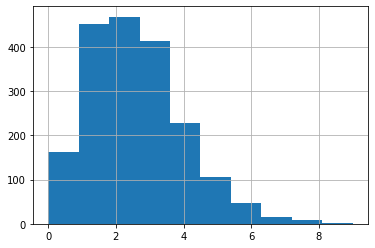

In [39]:
# Uma breve visualização das distribuições dos gols das partidas permite perceber que a maior parte das partidas tem entre 1 e 3 gols.
qtd_gols_df.hist()

### PROF
> SOLUÇÃO DO PROF ABAIXO. Achei muito boa, bem mais simples do que eu fiz.
Ele simplesmente adicionou uma nova coluna com a soma dos gols manualmente, e então ordenou e pegou os primeiros valores

In [40]:
# Primeiro, o prof criou um campo novo para acrescentar a quantidade total de gols naquele jogo
jogos_df['qtd_total_partida'] = jogos_df['qtd_gols_clube1'] + jogos_df['qtd_gols_clube2']
jogos_df.sort_values(by='qtd_total_partida', ascending = False).head(1) # o prof tinha feito head(), eu que coloquei head(1) pq facilita

,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor,data_dt,qtd_total_partida
1568,08/06/2017,Quinta-feira,20:00,5ª Rodada,3,6,Arena Condá,SC,Santa Catarina,RS,Rio Grande do Sul,RS,Rio Grande do Sul,Chapecoense,Grêmio,Grêmio,2017-06-08,9


### OBS: 
As células a seguir são de quando eu resolvi utilizando todos os índexes das chaves de importação, o que foi mais complicado e resultava em duplicidade de algumas buscas por índex

O comando anterior resultou em duas partidas diferentes, pois as chaves não são únicas.
> Afinal, os mesmos clubes podem jogar no mesmo estadio com um mesmo vencedor em datas diferentes, e foi o que houve.

Assim, será necessário mais um comando para selecionar a entrada única de partida com mais gols. Há algumas opções, dentre as quais:


*   Podemos incluir a coluna data entre as chaves de jogos_df e repetir a operação
*   Podemos incluir a coluna data no dataframe qtd_gols_df e utilizar esta informação
*   Podemos simplesmente buscar em jogos_df qual entrada possui a quantidade de gols sabendo qual foi o máximo. 

> A terceira opção será feita na linha abaixo, a segunda ficará a seguir.

In [41]:
# Realiza uma query em jogos_df somando a quantidade de gols de cada clube em busca da máxima quantidade de gols
jogos_df.query('qtd_gols_clube1 + qtd_gols_clube2 == @qtd_gols_df.iloc[0]')

,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor,data_dt,qtd_total_partida
1568,08/06/2017,Quinta-feira,20:00,5ª Rodada,3,6,Arena Condá,SC,Santa Catarina,RS,Rio Grande do Sul,RS,Rio Grande do Sul,Chapecoense,Grêmio,Grêmio,2017-06-08,9


In [42]:
# Repetindo a criação do df da quantidade de gols e acrescentando a data
qtd_gols_data_df = jogos_df[['qtd_gols_clube1', 'qtd_gols_clube2']].sum(axis=1).to_frame('gols') # Não ordenando, para depois juntar a data. E Convertendo pra dataframe, pois estava como series
qtd_gols_data_df['data'] = jogos_df['data'] # Acrescentando coluna data
qtd_gols_data_df.sort_values(by='gols', ascending = False)

### Aqui continuaria, utilizando a data para ajudar a diferenciar...


,gols,data
1568,9,08/06/2017
301,8,26/10/2013
169,8,01/09/2013
1259,8,30/06/2016
1526,8,14/05/2017
...,...,...
897,0,19/07/2015
449,0,28/05/2014
1593,0,18/06/2017
1592,0,17/06/2017


## d. Qual foi a maior goleada dentre todas temporadas?
Obs: maior diferença de gols entre um time e outro

In [43]:
# Selecionando coluna quantidade de gols de cada time, calculando a diferença entre eles, 
# tomando o módulo do valor (pois dependendo do vencedor o número será positivo ou negativo),
# e finalmente organizando em ordem decrescente
dif_gols_df = jogos_df[['qtd_gols_clube1', 'qtd_gols_clube2']].diff(axis=1).abs().sort_values(by='qtd_gols_clube2', ascending = False)
dif_gols_df.drop(columns='qtd_gols_clube1', inplace=True) # Removendo a coluna de gols do time 1, que não faz mais sentido
dif_gols_df.rename(columns={'qtd_gols_clube2':'Dif_gols'}, inplace=True) # Tornando o nome da coluna significativo # Não é necessário trabalhando com series
#dif_gols_df=dif_gols_df.squeeze()
dif_gols_df


,Dif_gols
609,6.0
971,6.0
412,6.0
8,5.0
929,5.0
...,...
512,0.0
510,0.0
509,0.0
1413,0.0


In [44]:
# Localiza as ocorrências de dif_gols = seu valor máximo e pega o index destas linhas
dif_gols_index = dif_gols_df.loc[dif_gols_df['Dif_gols'] == dif_gols_df.max().max()].index
jogos_df.sort_index().iloc[dif_gols_index]


,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor,data_dt,qtd_total_partida
609,21/09/2014,Domingo,18h30,23ª Rodada,6,0,Serra Dourada,GO,Goiás,SP,São Paulo,GO,Goiás,Goiás,Palmeiras,Goiás,2014-09-21,6
971,02/09/2015,Quarta-feira,19h30,22ª Rodada,6,0,Beira Rio,RS,Rio Grande do Sul,RJ,Rio de Janeiro,RS,Rio Grande do Sul,Internacional,Vasco,Internacional,2015-09-02,6
412,10/05/2014,Sábado,21h00,4ª Rodada,6,0,Maracanã,RJ,Rio de Janeiro,SC,Santa Catarina,RJ,Rio de Janeiro,Botafogo,Criciúma,Botafogo,2014-05-10,6


### PROF
> SOLUÇÃO DO PROF ABAIXO. Também achei boa, bem mais simples do que a minha, porém ele só encontrou uma partida, ao passo que houve 3 com a mesma diferença.

In [45]:
# Primeiro, o prof criou um campo novo para acrescentar a diferença de gols naquele jogo
jogos_df['qtd_total_goleada'] = jogos_df['qtd_gols_clube1'] - jogos_df['qtd_gols_clube2']
jogos_df['qtd_total_goleada'] = jogos_df['qtd_total_goleada'].abs()
jogos_df.sort_values(by='qtd_total_goleada', ascending = False).head(1) 
  # Curiosamente, neste caso o prof usou o head(1) direto e só percebeu o jogo do GOIÁS, 
  # mas neste caso havia 3 partidas com a mesma goleada, então deveria ter inicialmente olhado com head()

,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor,data_dt,qtd_total_partida,qtd_total_goleada
609,21/09/2014,Domingo,18h30,23ª Rodada,6,0,Serra Dourada,GO,Goiás,SP,São Paulo,GO,Goiás,Goiás,Palmeiras,Goiás,2014-09-21,6,6


## e. Qual estado teve mais vitórias em 2016?

In [46]:
## CASO NÃO TIVESSE SIDO FEITO ATÉ AGORA,EXECUTAR:
## Convertendo os dados da coluna 'data' em jogos_df para tipo 'date'
#jogos_df['data_dt'] = pd.to_datetime(jogos_df['data'], format = '%d/%m/%Y')

In [47]:
# Filtrando apenas os jogos de 2016
jogos_2016_df = jogos_df[jogos_df['data_dt'].dt.strftime('%Y') == '2016']
jogos_2016_df

,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor,data_dt,qtd_total_partida,qtd_total_goleada
1140,14/05/2016,Sábado,16:00,1ª Rodada,1,0,Raulino de Oliveira,RJ,Rio de Janeiro,PE,Pernambuco,RJ,Rio de Janeiro,Flamengo,Sport,Flamengo,2016-05-14,1,1
1141,14/05/2016,Sábado,16:00,1ª Rodada,4,0,Palestra Ítalia,SP,São Paulo,PR,Paraná,SP,São Paulo,Palmeiras,Atlético-PR,Palmeiras,2016-05-14,4,4
1142,14/05/2016,Sábado,18:30,1ª Rodada,1,0,Independência,MG,Minas Gerais,SP,São Paulo,MG,Minas Gerais,Atlético-MG,Santos,Atlético-MG,2016-05-14,1,1
1143,14/05/2016,Sábado,21:00,1ª Rodada,1,0,Couto Pereira,PR,Paraná,MG,Minas Gerais,PR,Paraná,Coritiba,Cruzeiro,Coritiba,2016-05-14,1,1
1144,15/05/2016,Domingo,11:00,1ª Rodada,4,1,Arruda,PE,Pernambuco,ES,Espírito Santo,PE,Pernambuco,Santa Cruz,Vitória,Santa Cruz,2016-05-15,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,11/12/2016,Domingo,17:00,38ª Rodada,2,0,Moisés Lucarelli,SP,São Paulo,PR,Paraná,SP,São Paulo,Ponte Preta,Coritiba,Ponte Preta,2016-12-11,2,2
1516,11/12/2016,Domingo,17:00,38ª Rodada,1,0,Vila Belmiro,SP,São Paulo,MG,Minas Gerais,SP,São Paulo,Santos,América-MG,Santos,2016-12-11,1,1
1517,11/12/2016,Domingo,17:00,38ª Rodada,5,0,Pacaembu,SP,São Paulo,PE,Pernambuco,SP,São Paulo,São Paulo,Santa Cruz,São Paulo,2016-12-11,5,5
1518,11/12/2016,Domingo,17:00,38ª Rodada,2,0,Ilha do Retiro,PE,Pernambuco,SC,Santa Catarina,PE,Pernambuco,Sport,Figueirense,Sport,2016-12-11,2,2


In [48]:
# Agrupando pelo nome do estado do clube que venceu, utilizando a data como contador, e organizando decrescente
estados_venc = jogos_2016_df.groupby(by='desc_estado_vencedor')['data'].count().sort_values(ascending=False)
estados_venc

desc_estado_vencedor
Não Identificado     95
São Paulo            90
Rio de Janeiro       50
Minas Gerais         38
Paraná               28
Rio Grande do Sul    25
Santa Catarina       21
Pernambuco           21
Espírito Santo       12
Name: data, dtype: int64

In [49]:
# Percebemos que houve mais empates do que vitórias de qualquer estado, portanto o estado mais vitorioso em 2016 foi:
estados_venc.index[1]

'São Paulo'

### PROF
> SOLUÇÃO DO PROF ABAIXO.

In [50]:
# Repetiu o filtro da data com str.slice, coincidentemente também contou o campo data, e apenas olhando disse qual o estado
jogos_df[jogos_df['data'].str.slice(start=6) == '2016'].groupby('desc_estado_vencedor')['data'].count().sort_values(ascending=False)

desc_estado_vencedor
Não Identificado     95
São Paulo            90
Rio de Janeiro       50
Minas Gerais         38
Paraná               28
Rio Grande do Sul    25
Santa Catarina       21
Pernambuco           21
Espírito Santo       12
Name: data, dtype: int64

## CONCLUSÃO
Os códigos do professor foram bem mais simples, porque ele não se importou em acrescentar colunas extras para cálculos intermediários, nem em converter a data, nem em extrair a informação final exata. 

## f. A partir daqui, perguntas que eu mesmo fiz.



### Quantos gols cada time fez em cada temporada?







In [51]:
# Agrupa por ano (precisa do .dt.year pra pegar apenas o ano no agrupamento da data)
# e tambem agrupa por clube, depois soma os gols, tanto como time 1 quanto como time 2
jogos_df.groupby([jogos_df['data_dt'].dt.year,'desc_clube_1'])['qtd_gols_clube1'].sum() + jogos_df.groupby([jogos_df['data_dt'].dt.year,'desc_clube_2'])['qtd_gols_clube2'].sum()


data_dt  desc_clube_1
2013     Atlético-MG     49
         Atlético-PR     65
         Bahia           37
         Botafogo        55
         Corinthians     27
                         ..
2017     Santos          42
         Sport           46
         São Paulo       48
         Vasco           40
         Vitória         50
Length: 100, dtype: int64



### Quantos gols levou cada time em 2016?



In [52]:
jogos_df[jogos_df['data_dt'].dt.strftime('%Y') == '2016'].groupby('desc_clube_1')['qtd_gols_clube2'].sum()+jogos_df[jogos_df['data_dt'].dt.strftime('%Y') == '2016'].groupby('desc_clube_2')['qtd_gols_clube1'].sum()

desc_clube_1
América-MG       58
Atlético-MG      50
Atlético-PR      32
Botafogo         39
Chapecoense      53
Corinthians      42
Coritiba         42
Cruzeiro         49
Figueirense      50
Flamengo         35
Fluminense       45
Grêmio           44
Internacional    41
Palmeiras        32
Ponte Preta      52
Santa Cruz       69
Santos           35
Sport            55
São Paulo        36
Vitória          53
dtype: int64



### Quão relevante é o fator mando de campo? 

> Ou seja, dentre todas as partidas disputadas, qual a distribuição de vitória do mandante, vitória do visitante ou empate



In [53]:
jogos_df

,data,dia,horario,rodada,qtd_gols_clube1,qtd_gols_clube2,desc_arena,sigla_estado_clube1,desc_estado_clube1,sigla_estado_clube2,desc_estado_clube2,sigla_estado_vencedor,desc_estado_vencedor,desc_clube_1,desc_clube_2,desc_clube_vencedor,data_dt,qtd_total_partida,qtd_total_goleada
0,25/05/2013,Sábado,18:30,1ª Rodada,2,2,Fonte Nova,ES,Espírito Santo,RS,Rio Grande do Sul,XX,Não Identificado,Vitória,Internacional,Não Identificado,2013-05-25,4,0
1,25/05/2013,Sábado,18:30,1ª Rodada,1,0,São Januário,RJ,Rio de Janeiro,SP,São Paulo,RJ,Rio de Janeiro,Vasco,Portuguesa,Vasco,2013-05-25,1,1
2,25/05/2013,Sábado,21:00,1ª Rodada,1,1,Pacaembu,SP,São Paulo,RJ,Rio de Janeiro,XX,Não Identificado,Corinthians,Botafogo,Não Identificado,2013-05-25,2,0
3,26/05/2013,Domingo,16:00,1ª Rodada,2,0,Alfredo Jaconi,RS,Rio Grande do Sul,PE,Pernambuco,RS,Rio Grande do Sul,Grêmio,Náutico,Grêmio,2013-05-26,2,2
4,26/05/2013,Domingo,16:00,1ª Rodada,3,1,Heriberto Hülse,SC,Santa Catarina,BA,Bahia,SC,Santa Catarina,Criciúma,Bahia,Criciúma,2013-05-26,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,03/12/2017,Domingo,17:00,38ª Rodada,2,2,Engenhão,RJ,Rio de Janeiro,MG,Minas Gerais,XX,Não Identificado,Botafogo,Cruzeiro,Não Identificado,2017-12-03,4,0
1896,03/12/2017,Domingo,17:00,38ª Rodada,1,0,Ilha do Retiro,PE,Pernambuco,SP,São Paulo,PE,Pernambuco,Sport,Corinthians,Sport,2017-12-03,1,1
1897,03/12/2017,Domingo,17:00,38ª Rodada,1,1,Olímpico,GO,Goiás,RJ,Rio de Janeiro,XX,Não Identificado,Atlético-GO,Fluminense,Não Identificado,2017-12-03,2,0
1898,03/12/2017,Domingo,17:00,38ª Rodada,4,3,Independência,MG,Minas Gerais,RS,Rio Grande do Sul,MG,Minas Gerais,Atlético-MG,Grêmio,Atlético-MG,2017-12-03,7,1


In [54]:
# cria uma nova coluna, preenchendo com o vencedor da partida ou com empate
condicoes = [(jogos_df['desc_clube_vencedor'] == jogos_df['desc_clube_1']),
             (jogos_df['desc_clube_vencedor'] == jogos_df['desc_clube_2']),
             (jogos_df['desc_clube_vencedor'] == 'Não Identificado')]
valores = ['Mandante', 'Visitante', 'Empate']

jogos_df['resultado'] = np.select(condicoes, valores)


In [55]:
# agrupa de acordo com vitoria de mandante, visitante ou empate
jogos_df.groupby('resultado')['rodada'].count()


resultado
Empate       489
Mandante     950
Visitante    461
Name: rodada, dtype: int64

In [56]:
# repete o comando anterior mas com resultado percentual
jogos_df.groupby('resultado')['rodada'].count()*100/jogos_df.shape[0]

#Percebemos que 50% dos jogos acabam com vitoria do mandante, 
# e há um pouco mais de empate do que vitoria do visitante

resultado
Empate       25.736842
Mandante     50.000000
Visitante    24.263158
Name: rodada, dtype: float64

### Em qual rodada foram marcados mais gols?

In [57]:
gols_rodada = jogos_df.groupby('rodada')['qtd_gols_clube1'].sum()+jogos_df.groupby('rodada')['qtd_gols_clube2'].sum()
gols_rodada.sort_values(ascending=False)

rodada
31ª Rodada    141
12ª Rodada    138
18ª Rodada    136
9ª Rodada     132
6ª Rodada     132
28ª Rodada    130
37ª Rodada    127
35ª Rodada    127
24ª Rodada    124
22ª Rodada    123
23ª Rodada    122
13ª Rodada    121
27ª Rodada    121
5ª Rodada     121
38ª Rodada    121
36ª Rodada    120
29ª Rodada    120
3ª Rodada     119
25ª Rodada    118
2ª Rodada     117
1ª Rodada     117
20ª Rodada    116
8ª Rodada     116
30ª Rodada    115
26ª Rodada    115
4ª Rodada     114
15ª Rodada    114
16ª Rodada    114
34ª Rodada    113
10ª Rodada    113
7ª Rodada     112
21ª Rodada    112
33ª Rodada    112
17ª Rodada    110
19ª Rodada    109
11ª Rodada    109
14ª Rodada    108
32ª Rodada     99
dtype: int64

In [58]:
gols_rodada.describe()

count     38.000000
mean     119.157895
std        8.918630
min       99.000000
25%      113.250000
50%      117.500000
75%      122.750000
max      141.000000
dtype: float64